<a href="https://colab.research.google.com/github/joseluisfalla/QA_JFALLA/blob/main/assignment_1/introduction_to_qiskit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# First of all, we need to make sure we install the Qiskit library on our Jupyter notebook before we can begin.
# You can use the syntax %pip install <library> to install libraries on your Jupyter environment.
!pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 35.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 5.9 MB/s eta 0:00:00


In [2]:
# Now, throughout this course, we'll be using simulators to run our circuits.
# It doesn't really make sense to use real quantum hardware, as the queuing times are inconvenient.
# For our simulations, we'll be using qiskit-aer, a package for quantum computing simulators
# with realistic noise models that provides different simulation methods.
!pip install qiskit_aer
%pip install pylatexenc

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=0c7b7f71dfa9967b2b1dd7b9f7d9df320c5da6539bda18a1832bd6a9322b6da8
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc


Note that the way I've installed these libraries is in violation to PEP8 standards. All installations and imports (to follow) should be placed in the same block of code.

In [29]:
# Now that we've downloaded the libraries, we can import them (along with some other useful ones) into our notebook.
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import Aer

In [18]:
# In the natural order of things, we begin by defining (instantiating) our circuit.
qc = QuantumCircuit(4) # A quantum circuit with 4 qubits. This circuit only contains a quantum register; we'll eventually work with circuits with classical registers.

Useful tip: if you forget what the input for any function is and you don't want to go digging in the documentation, you can always use the syntax *function?*, and a help bar with appear on the left-hand side with information about the function's attributes (try it out below).

In [6]:
QuantumCircuit?

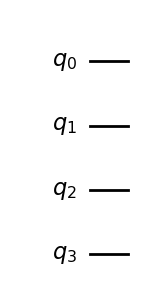

In [13]:
# Qiskit allows us to visualize our circuit (that's why we needed to install pylatexenc--see installs)
qc.draw('mpl')

Fig 1. Visualization of a Qiskit circuit composed of a 4-qubit register.

*NB. Here's an example of how all figures should be captioned in your notebook.*

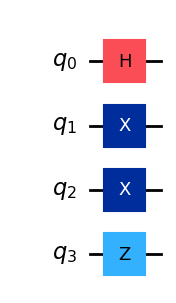

In [23]:
# We can act on these qubits with a series of quantum gates now. We'll use some well-known single-qubit gates: The Hadamard gate and the X, Z Pauli gates.
# We can go about this a couple of ways.
# First way:
from qiskit.circuit.library import HGate, XGate, ZGate
hadamard_gate = HGate()
x_gate = XGate()
z_gate = ZGate()

qc = QuantumCircuit(4)

qc.append(hadamard_gate, [0]) # with qc.append() the first input is the gate you wish to apply, and the second input is the qubits you want to act on.
qc.append(x_gate, [1])
qc.append(x_gate, [2])
qc.append(z_gate, [3])

# Visualize the circuit now
qc.draw('mpl')

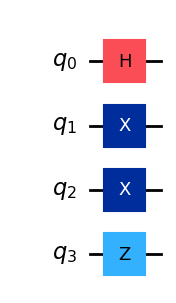

In [21]:
# Here's the second way to do it (which I personally prefer, you'll see why).
qc = QuantumCircuit(4)

qc.h(0)
qc.x(1)
qc.x(2)
qc.z(3)

qc.draw('mpl')

As you can see, both methods give us the same circuit. Qiskit's circuit library is quite extensive, [here](https://docs.quantum.ibm.com/guides/circuit-library) you can find a comprehensive list of the quantum gates at your disposal, including two- and multi-qubit gates.

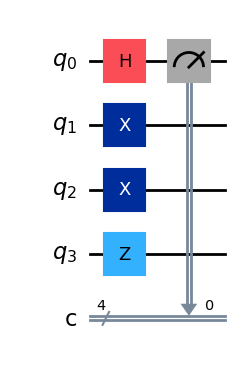

In [25]:
# Usually, after constructing our circuit, we'll want to run it and look at the results.
# Before we can run the circuit though, we have to specify our measurement.
# There a couple of measurement methods. We'll take a look at both.

# First, mesuring individual qubits. In order to measure individual qubits, we have to instantiate our circuit with both a classical and a quantum register.
qc = QuantumCircuit(4, 4) # 4 qubits, 4 classical bits

# Apply gates
qc.h(0)
qc.x(1)
qc.x(2)
qc.z(3)

# Define measurement
qc.measure(0, 0) # Measures qubit 0 and puts the result in bit 0
qc.draw('mpl')

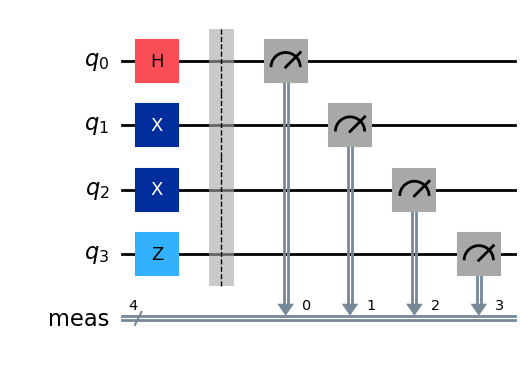

In [26]:
# More often that not, we'll perform a measurement on all qubits
qc = QuantumCircuit(4)

# Apply gates
qc.h(0)
qc.x(1)
qc.x(2)
qc.z(3)

# Define measurement
qc.measure_all()
qc.draw('mpl')

Notice that for the measure_all() method it is not necessary to create a classical register when instatiating QuantumCircuit; Qiskit automatically creates a classical register with the same number of bits as qubits.

In [30]:
# Now we're ready to define our simulator and run the circuit.
# First, choose a backend:
backend = Aer.get_backend('statevector_simulator')
job = backend.run(transpile(qc, backend), shots=1024) # An intermediate transpilation step is needed to run the job. The number of shots refers to how many times we run the circuit.
result = job.result() # Get the results

You can find a list of Aer simulator methods [here](https://qiskit.github.io/qiskit-aer/tutorials/1_aersimulator.html).
Also, [here](https://docs.quantum.ibm.com/guides/transpile)'s a page that explains what transpilation is and why it is necessary.

In [31]:
# Let's look at the results.
result

Result(backend_name='statevector_simulator', backend_version='0.16.1', qobj_id='', job_id='ab53d8d4-c7c3-4f4c-acf8-1969ad934483', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x7': 544, '0x6': 480}, statevector=Statevector([ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j,
              0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
             -0.+0.j, -0.+0.j],
            dims=(2, 2, 2, 2))), header=QobjExperimentHeader(creg_sizes=[['meas', 4]], global_phase=0.0, memory_slots=4, n_qubits=4, name='circuit-169', qreg_sizes=[['q', 4]], metadata={}), status=DONE, seed_simulator=714454161, metadata={'time_taken': 0.018035512, 'num_bind_params': 1, 'parallel_state_update': 1, 'required_memory_mb': 1, 'input_qubit_map': [[3, 3], [2, 2], [1, 1], [0, 0]], 'method': 'statevector', 'device': 'CPU', 'num_qubits': 4, 'active_input_qubits': [0, 1, 2, 3], 'num_clbits': 4, 'remapped_qubits': False, 'p

All the information about the run is here. When running quantum circuits, one of the things we want to look at is at the counts we get for each of the measurements. Let's look at that now.

In [36]:
counts = result.get_counts()
counts

{'0111': 544, '0110': 480}

Here we see that out of the 2^4 possible bitstrings, we only get counts for two bitstrings. Why is this?

## You answer here

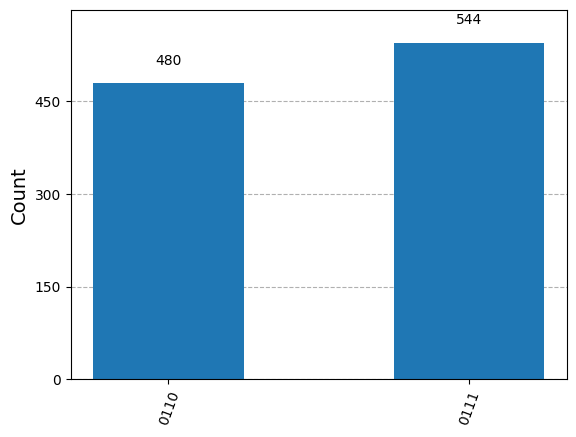

In [37]:
# Let's visualize these results
plot_histogram(counts)